## Logic Based FizzBuzz Function [Software 1.0]

In [45]:
import numpy as np
#!pip install tensorflow
import tensorflow as tf

In [46]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [47]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    # A list in python can be used to store items of different types. We are using Lists because they are mutable i.e., they can
    # be changed once declared. Lists are very flexible. Lists are useful for storing lot of values and also to iterate over those
    # values or to modify those values.
    
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    # Why are we using machines in the first place? - because they are able to store and process knowledge at faster rates. 
    # Similar to humans who learn from context and are able to predict the value of the unknown, the machine learning models
    # can do the same when they see enough relevant data. So the role of training data is to to train our machine learning models.
    # after training the model on a particular training data, if satisfactory we can use the model to predict the outputs for different inputs.
    
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    # Dataframe is used to build a kind of table/database to store values of different fields i.e., the data is stored as rows and 
    # columns. Each row contains measurements or values of an instance, while each column contains data of a specific variable.
    
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [48]:
def processData(dataset):
    
    # Why do we have to process?
    # We have to process to encode the data. We need to turn each input into a vector of 'activations' (joelgrus.com). One way is to convert the input to binary.
    # The goal of processing in our case is to convert input to binary form and the output(label) to discrete values. So our input will be binary and output will be numbers 0, 1, 2, 3
    # The neural network inputs represent a kind of "intensity" so if we have larger value inputs they have greater intensity. So, to avoid this difference in magnitudes we do 1-of-k encoding which would ensure that training set isn't biased towards small or large numbers.
    # It also increases the number of features as a single integer is being represented by 10 bits.
    
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [49]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        # Because in the training data we have 900 values and to convert all these values into binary form we need 10 bits because,
        # 2**10 = 1024. 10 bits can be used to represent 1024 values where as 9 bits(2**9) can only represent 512 values.
        
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [50]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import keras

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # The core abstraction of every model in keras is the notion of layers. Models are used to define our neural networks.
    
    # Why use Dense layer and then activation?
    # In general both the dense layer and the activation in the same line but the advantage of using dense layer first and then
    # activation is the outputs of the dense layer(last layer) could be retrieved before activation. 
    
    # Why use sequential model with layers?
    # Because we have single-input and single-output. Sequential model is also simple and used for implementing sequence of layers using model.add
    # Even though the Functional API can also be used to do this, sequential model is simple and is specifically designed for these simple cases
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    # dropout is a (regularization) technique of ignoring randomly selected neurons during training.
    # The effect is, the network becomes less sensitive to specific weight of the neurons and this results in a network that is more generalizable.
    # The main goal is to prevent overfitting the training data.
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # 1. Because it is a multiple classification problem and sigmoid and ReLU can't help much in this case.
    # 2. Softmax function outputs a probability distribution, it tells u the probability that any of the classes are true which is more desirable. 
    # 3. Its derivatie is computationally cheap to calcuate and useful during backpropogation.
    # 4. The exp in the softmax function roughly cancels out the log in the cross-entropy loss causing the loss to be roughly linear in z_i.
    #    This leads to a roughly constant gradient, when the model is wrong, allowing it to correct itself quickly. Thus, a wrong saturated softmax does not cause a vanishing gradient. (from: https://stackoverflow.com/questions/17187507/why-use-softmax-as-opposed-to-standard-normalization)
    
    model.summary()
    
    # Why use categorical_crossentropy?
    # Since, the output(the dependent variable) has more than 2 categories in output we use categorical_crossentropy. The categoricol cross-entropy aims to maximize the softmax output of the correct label.
    # Because, the output from softmax is a probability value between 0 and 1. The cross entropy can be used with other activation functions as well but it is better suited(and gives better results) with softmax
    # Also, the derivative of cross entropy loss with Softmax is simple
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [52]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [53]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               2816      
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 1028      
_________________________________________________________________
activation_12 (Activation)   (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [54]:
validation_data_split = 0.2 #takes last 20% of the data from the training set as validation data

num_epochs = 1500
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=0, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/1500
720/720 [==============================] - 1s 1ms/step - loss: 1.3051 - acc: 0.4306 - val_loss: 1.2248 - val_acc: 0.5333
Epoch 2/1500
720/720 [==============================] - 0s 19us/step - loss: 1.2132 - acc: 0.5306 - val_loss: 1.1682 - val_acc: 0.5333
Epoch 3/1500
720/720 [==============================] - 0s 22us/step - loss: 1.1660 - acc: 0.5333 - val_loss: 1.1625 - val_acc: 0.5333
Epoch 4/1500
720/720 [==============================] - 0s 27us/step - loss: 1.1537 - acc: 0.5333 - val_loss: 1.1661 - val_acc: 0.5333
Epoch 5/1500
720/720 [==============================] - 0s 28us/step - loss: 1.1507 - acc: 0.5319 - val_loss: 1.1630 - val_acc: 0.5333
Epoch 6/1500
720/720 [==============================] - 0s 28us/step - loss: 1.1520 - acc: 0.5333 - val_loss: 1.1569 - val_acc: 0.5333
Epoch 7/1500
720/720 [==============================] - 0s 27us/step - loss: 1.1575 - acc: 0.5333 - val_loss: 1.1508 - val_acc: 0.5333
Epoch 8/15

Epoch 61/1500
720/720 [==============================] - 0s 19us/step - loss: 1.0317 - acc: 0.5514 - val_loss: 1.0992 - val_acc: 0.5333
Epoch 62/1500
720/720 [==============================] - 0s 22us/step - loss: 1.0213 - acc: 0.5542 - val_loss: 1.0976 - val_acc: 0.5333
Epoch 63/1500
720/720 [==============================] - 0s 19us/step - loss: 1.0163 - acc: 0.5556 - val_loss: 1.0975 - val_acc: 0.5389
Epoch 64/1500
720/720 [==============================] - 0s 21us/step - loss: 1.0121 - acc: 0.5625 - val_loss: 1.0970 - val_acc: 0.5389
Epoch 65/1500
720/720 [==============================] - 0s 22us/step - loss: 1.0057 - acc: 0.5542 - val_loss: 1.0955 - val_acc: 0.5389
Epoch 66/1500
720/720 [==============================] - 0s 22us/step - loss: 1.0135 - acc: 0.5583 - val_loss: 1.0920 - val_acc: 0.5389
Epoch 67/1500
720/720 [==============================] - 0s 23us/step - loss: 1.0070 - acc: 0.5625 - val_loss: 1.0909 - val_acc: 0.5389
Epoch 68/1500
720/720 [=========================

720/720 [==============================] - 0s 21us/step - loss: 0.8262 - acc: 0.6528 - val_loss: 0.9972 - val_acc: 0.6278
Epoch 122/1500
720/720 [==============================] - 0s 21us/step - loss: 0.8145 - acc: 0.6819 - val_loss: 0.9969 - val_acc: 0.6333
Epoch 123/1500
720/720 [==============================] - 0s 21us/step - loss: 0.8163 - acc: 0.6639 - val_loss: 0.9917 - val_acc: 0.6167
Epoch 124/1500
720/720 [==============================] - 0s 22us/step - loss: 0.8114 - acc: 0.6792 - val_loss: 0.9904 - val_acc: 0.6167
Epoch 125/1500
720/720 [==============================] - 0s 23us/step - loss: 0.8124 - acc: 0.6736 - val_loss: 0.9884 - val_acc: 0.6222
Epoch 126/1500
720/720 [==============================] - 0s 22us/step - loss: 0.8018 - acc: 0.6681 - val_loss: 0.9858 - val_acc: 0.6278
Epoch 127/1500
720/720 [==============================] - 0s 21us/step - loss: 0.8116 - acc: 0.6681 - val_loss: 0.9843 - val_acc: 0.6333
Epoch 128/1500
720/720 [==============================] 

Epoch 181/1500
720/720 [==============================] - 0s 21us/step - loss: 0.6472 - acc: 0.7708 - val_loss: 0.8723 - val_acc: 0.6889
Epoch 182/1500
720/720 [==============================] - 0s 20us/step - loss: 0.6667 - acc: 0.7708 - val_loss: 0.8699 - val_acc: 0.7000
Epoch 183/1500
720/720 [==============================] - 0s 23us/step - loss: 0.6549 - acc: 0.7639 - val_loss: 0.8660 - val_acc: 0.6944
Epoch 184/1500
720/720 [==============================] - 0s 21us/step - loss: 0.6736 - acc: 0.7667 - val_loss: 0.8652 - val_acc: 0.7000
Epoch 185/1500
720/720 [==============================] - 0s 21us/step - loss: 0.6418 - acc: 0.7639 - val_loss: 0.8646 - val_acc: 0.7000
Epoch 186/1500
720/720 [==============================] - 0s 21us/step - loss: 0.6435 - acc: 0.7750 - val_loss: 0.8631 - val_acc: 0.7000
Epoch 187/1500
720/720 [==============================] - 0s 21us/step - loss: 0.6601 - acc: 0.7625 - val_loss: 0.8628 - val_acc: 0.7056
Epoch 188/1500
720/720 [=================

Epoch 241/1500
720/720 [==============================] - 0s 21us/step - loss: 0.5335 - acc: 0.8167 - val_loss: 0.7729 - val_acc: 0.7389
Epoch 242/1500
720/720 [==============================] - 0s 21us/step - loss: 0.5396 - acc: 0.8431 - val_loss: 0.7712 - val_acc: 0.7444
Epoch 243/1500
720/720 [==============================] - 0s 24us/step - loss: 0.5288 - acc: 0.8306 - val_loss: 0.7692 - val_acc: 0.7500
Epoch 244/1500
720/720 [==============================] - 0s 25us/step - loss: 0.5343 - acc: 0.8347 - val_loss: 0.7669 - val_acc: 0.7556
Epoch 245/1500
720/720 [==============================] - 0s 21us/step - loss: 0.5239 - acc: 0.8292 - val_loss: 0.7638 - val_acc: 0.7333
Epoch 246/1500
720/720 [==============================] - 0s 23us/step - loss: 0.5255 - acc: 0.8375 - val_loss: 0.7624 - val_acc: 0.7444
Epoch 247/1500
720/720 [==============================] - 0s 21us/step - loss: 0.5329 - acc: 0.8264 - val_loss: 0.7615 - val_acc: 0.7444
Epoch 248/1500
720/720 [=================

Epoch 301/1500
720/720 [==============================] - 0s 24us/step - loss: 0.4720 - acc: 0.8542 - val_loss: 0.6967 - val_acc: 0.7778
Epoch 302/1500
720/720 [==============================] - 0s 23us/step - loss: 0.4797 - acc: 0.8500 - val_loss: 0.6941 - val_acc: 0.7556
Epoch 303/1500
720/720 [==============================] - 0s 21us/step - loss: 0.4678 - acc: 0.8375 - val_loss: 0.6942 - val_acc: 0.7667
Epoch 304/1500
720/720 [==============================] - 0s 21us/step - loss: 0.4710 - acc: 0.8528 - val_loss: 0.6943 - val_acc: 0.7500
Epoch 305/1500
720/720 [==============================] - 0s 21us/step - loss: 0.4606 - acc: 0.8472 - val_loss: 0.6924 - val_acc: 0.7611
Epoch 306/1500
720/720 [==============================] - 0s 24us/step - loss: 0.4438 - acc: 0.8625 - val_loss: 0.6900 - val_acc: 0.7833
Epoch 307/1500
720/720 [==============================] - 0s 31us/step - loss: 0.4417 - acc: 0.8611 - val_loss: 0.6856 - val_acc: 0.7833
Epoch 308/1500
720/720 [=================

Epoch 361/1500
720/720 [==============================] - 0s 23us/step - loss: 0.4419 - acc: 0.8417 - val_loss: 0.6409 - val_acc: 0.8111
Epoch 362/1500
720/720 [==============================] - 0s 22us/step - loss: 0.4243 - acc: 0.8597 - val_loss: 0.6388 - val_acc: 0.7944
Epoch 363/1500
720/720 [==============================] - 0s 21us/step - loss: 0.4436 - acc: 0.8667 - val_loss: 0.6393 - val_acc: 0.7889
Epoch 364/1500
720/720 [==============================] - 0s 22us/step - loss: 0.4390 - acc: 0.8458 - val_loss: 0.6378 - val_acc: 0.8000
Epoch 365/1500
720/720 [==============================] - 0s 22us/step - loss: 0.4337 - acc: 0.8611 - val_loss: 0.6361 - val_acc: 0.8000
Epoch 366/1500
720/720 [==============================] - 0s 22us/step - loss: 0.3922 - acc: 0.8792 - val_loss: 0.6359 - val_acc: 0.8000
Epoch 367/1500
720/720 [==============================] - 0s 23us/step - loss: 0.4306 - acc: 0.8667 - val_loss: 0.6357 - val_acc: 0.8000
Epoch 368/1500
720/720 [=================

Epoch 421/1500
720/720 [==============================] - 0s 20us/step - loss: 0.4154 - acc: 0.8569 - val_loss: 0.6031 - val_acc: 0.8222
Epoch 422/1500
720/720 [==============================] - 0s 21us/step - loss: 0.4011 - acc: 0.8653 - val_loss: 0.6056 - val_acc: 0.8111
Epoch 423/1500
720/720 [==============================] - 0s 21us/step - loss: 0.4053 - acc: 0.8639 - val_loss: 0.6032 - val_acc: 0.8000
Epoch 424/1500
720/720 [==============================] - 0s 21us/step - loss: 0.3648 - acc: 0.8806 - val_loss: 0.6032 - val_acc: 0.8111
Epoch 425/1500
720/720 [==============================] - 0s 23us/step - loss: 0.4059 - acc: 0.8694 - val_loss: 0.6035 - val_acc: 0.8111
Epoch 426/1500
720/720 [==============================] - 0s 24us/step - loss: 0.4325 - acc: 0.8486 - val_loss: 0.6103 - val_acc: 0.7944
Epoch 427/1500
720/720 [==============================] - 0s 28us/step - loss: 0.3760 - acc: 0.8750 - val_loss: 0.6077 - val_acc: 0.7889
Epoch 428/1500
720/720 [=================

Epoch 481/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3339 - acc: 0.9083 - val_loss: 0.5653 - val_acc: 0.8389
Epoch 482/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3479 - acc: 0.8819 - val_loss: 0.5646 - val_acc: 0.8333
Epoch 483/1500
720/720 [==============================] - 0s 21us/step - loss: 0.3570 - acc: 0.8833 - val_loss: 0.5661 - val_acc: 0.8444
Epoch 484/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3555 - acc: 0.8861 - val_loss: 0.5696 - val_acc: 0.8389
Epoch 485/1500
720/720 [==============================] - 0s 21us/step - loss: 0.3561 - acc: 0.8681 - val_loss: 0.5687 - val_acc: 0.8444
Epoch 486/1500
720/720 [==============================] - 0s 20us/step - loss: 0.3349 - acc: 0.8875 - val_loss: 0.5675 - val_acc: 0.8389
Epoch 487/1500
720/720 [==============================] - 0s 30us/step - loss: 0.3412 - acc: 0.8958 - val_loss: 0.5742 - val_acc: 0.8056
Epoch 488/1500
720/720 [=================

Epoch 541/1500
720/720 [==============================] - 0s 29us/step - loss: 0.3232 - acc: 0.8875 - val_loss: 0.5478 - val_acc: 0.8222
Epoch 542/1500
720/720 [==============================] - 0s 25us/step - loss: 0.3328 - acc: 0.8833 - val_loss: 0.5488 - val_acc: 0.8278
Epoch 543/1500
720/720 [==============================] - 0s 22us/step - loss: 0.3386 - acc: 0.8806 - val_loss: 0.5461 - val_acc: 0.8444
Epoch 544/1500
720/720 [==============================] - 0s 21us/step - loss: 0.3398 - acc: 0.8931 - val_loss: 0.5449 - val_acc: 0.8444
Epoch 545/1500
720/720 [==============================] - 0s 21us/step - loss: 0.3503 - acc: 0.8875 - val_loss: 0.5455 - val_acc: 0.8167
Epoch 546/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3460 - acc: 0.8861 - val_loss: 0.5469 - val_acc: 0.8167
Epoch 547/1500
720/720 [==============================] - 0s 58us/step - loss: 0.3211 - acc: 0.8986 - val_loss: 0.5520 - val_acc: 0.8167
Epoch 548/1500
720/720 [=================

Epoch 601/1500
720/720 [==============================] - 0s 25us/step - loss: 0.3232 - acc: 0.8889 - val_loss: 0.5268 - val_acc: 0.8333
Epoch 602/1500
720/720 [==============================] - 0s 25us/step - loss: 0.2902 - acc: 0.9042 - val_loss: 0.5248 - val_acc: 0.8333
Epoch 603/1500
720/720 [==============================] - 0s 22us/step - loss: 0.3227 - acc: 0.8972 - val_loss: 0.5253 - val_acc: 0.8389
Epoch 604/1500
720/720 [==============================] - 0s 27us/step - loss: 0.3213 - acc: 0.8847 - val_loss: 0.5244 - val_acc: 0.8278
Epoch 605/1500
720/720 [==============================] - 0s 26us/step - loss: 0.2868 - acc: 0.9181 - val_loss: 0.5269 - val_acc: 0.8389
Epoch 606/1500
720/720 [==============================] - 0s 26us/step - loss: 0.3132 - acc: 0.8917 - val_loss: 0.5221 - val_acc: 0.8611
Epoch 607/1500
720/720 [==============================] - 0s 28us/step - loss: 0.3318 - acc: 0.8847 - val_loss: 0.5249 - val_acc: 0.8611
Epoch 608/1500
720/720 [=================

Epoch 661/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3127 - acc: 0.8917 - val_loss: 0.5087 - val_acc: 0.8500
Epoch 662/1500
720/720 [==============================] - 0s 22us/step - loss: 0.3162 - acc: 0.8875 - val_loss: 0.5053 - val_acc: 0.8556
Epoch 663/1500
720/720 [==============================] - 0s 21us/step - loss: 0.2912 - acc: 0.9028 - val_loss: 0.5049 - val_acc: 0.8500
Epoch 664/1500
720/720 [==============================] - 0s 22us/step - loss: 0.2987 - acc: 0.8944 - val_loss: 0.5037 - val_acc: 0.8444
Epoch 665/1500
720/720 [==============================] - 0s 25us/step - loss: 0.2821 - acc: 0.9097 - val_loss: 0.5088 - val_acc: 0.8222
Epoch 666/1500
720/720 [==============================] - 0s 25us/step - loss: 0.3032 - acc: 0.8917 - val_loss: 0.5116 - val_acc: 0.8167
Epoch 667/1500
720/720 [==============================] - 0s 24us/step - loss: 0.3091 - acc: 0.8889 - val_loss: 0.5032 - val_acc: 0.8667
Epoch 668/1500
720/720 [=================

Epoch 721/1500
720/720 [==============================] - 0s 24us/step - loss: 0.3119 - acc: 0.8889 - val_loss: 0.4987 - val_acc: 0.8611
Epoch 722/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3225 - acc: 0.8931 - val_loss: 0.4983 - val_acc: 0.8667
Epoch 723/1500
720/720 [==============================] - 0s 21us/step - loss: 0.3080 - acc: 0.8903 - val_loss: 0.4981 - val_acc: 0.8556
Epoch 724/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3199 - acc: 0.8903 - val_loss: 0.5026 - val_acc: 0.8389
Epoch 725/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2806 - acc: 0.9028 - val_loss: 0.5009 - val_acc: 0.8500
Epoch 726/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2873 - acc: 0.9000 - val_loss: 0.5026 - val_acc: 0.8556
Epoch 727/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3004 - acc: 0.9056 - val_loss: 0.5002 - val_acc: 0.8444
Epoch 728/1500
720/720 [=================

Epoch 781/1500
720/720 [==============================] - 0s 25us/step - loss: 0.2743 - acc: 0.8986 - val_loss: 0.4834 - val_acc: 0.8389
Epoch 782/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3015 - acc: 0.8903 - val_loss: 0.4843 - val_acc: 0.8389
Epoch 783/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2929 - acc: 0.9139 - val_loss: 0.4876 - val_acc: 0.8556
Epoch 784/1500
720/720 [==============================] - 0s 24us/step - loss: 0.3258 - acc: 0.8708 - val_loss: 0.4883 - val_acc: 0.8389
Epoch 785/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3596 - acc: 0.8750 - val_loss: 0.4921 - val_acc: 0.8444
Epoch 786/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2781 - acc: 0.9028 - val_loss: 0.4891 - val_acc: 0.8667
Epoch 787/1500
720/720 [==============================] - 0s 25us/step - loss: 0.3195 - acc: 0.8861 - val_loss: 0.4887 - val_acc: 0.8444
Epoch 788/1500
720/720 [=================

Epoch 841/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2736 - acc: 0.9097 - val_loss: 0.4763 - val_acc: 0.8611
Epoch 842/1500
720/720 [==============================] - 0s 22us/step - loss: 0.2797 - acc: 0.9181 - val_loss: 0.4923 - val_acc: 0.8444
Epoch 843/1500
720/720 [==============================] - 0s 43us/step - loss: 0.2602 - acc: 0.9097 - val_loss: 0.4775 - val_acc: 0.8611
Epoch 844/1500
720/720 [==============================] - 0s 21us/step - loss: 0.2839 - acc: 0.9056 - val_loss: 0.4743 - val_acc: 0.8556
Epoch 845/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2988 - acc: 0.8903 - val_loss: 0.4755 - val_acc: 0.8500
Epoch 846/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2500 - acc: 0.9194 - val_loss: 0.4718 - val_acc: 0.8556
Epoch 847/1500
720/720 [==============================] - 0s 23us/step - loss: 0.3148 - acc: 0.8847 - val_loss: 0.4730 - val_acc: 0.8556
Epoch 848/1500
720/720 [=================

Epoch 901/1500
720/720 [==============================] - 0s 21us/step - loss: 0.2892 - acc: 0.8972 - val_loss: 0.4772 - val_acc: 0.8333
Epoch 902/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2759 - acc: 0.9111 - val_loss: 0.4840 - val_acc: 0.8556
Epoch 903/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2642 - acc: 0.9097 - val_loss: 0.4709 - val_acc: 0.8611
Epoch 904/1500
720/720 [==============================] - 0s 25us/step - loss: 0.2905 - acc: 0.8903 - val_loss: 0.4630 - val_acc: 0.8556
Epoch 905/1500
720/720 [==============================] - 0s 24us/step - loss: 0.2566 - acc: 0.9042 - val_loss: 0.4805 - val_acc: 0.8556
Epoch 906/1500
720/720 [==============================] - 0s 21us/step - loss: 0.2844 - acc: 0.8958 - val_loss: 0.4838 - val_acc: 0.8556
Epoch 907/1500
720/720 [==============================] - 0s 19us/step - loss: 0.2831 - acc: 0.8903 - val_loss: 0.4672 - val_acc: 0.8500
Epoch 908/1500
720/720 [=================

Epoch 961/1500
720/720 [==============================] - 0s 22us/step - loss: 0.2602 - acc: 0.9069 - val_loss: 0.4679 - val_acc: 0.8500
Epoch 962/1500
720/720 [==============================] - 0s 25us/step - loss: 0.2845 - acc: 0.9000 - val_loss: 0.4661 - val_acc: 0.8556
Epoch 963/1500
720/720 [==============================] - 0s 22us/step - loss: 0.2745 - acc: 0.9014 - val_loss: 0.4742 - val_acc: 0.8500
Epoch 964/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2770 - acc: 0.9139 - val_loss: 0.4626 - val_acc: 0.8389
Epoch 965/1500
720/720 [==============================] - 0s 21us/step - loss: 0.2470 - acc: 0.9097 - val_loss: 0.4695 - val_acc: 0.8333
Epoch 966/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2768 - acc: 0.9014 - val_loss: 0.4664 - val_acc: 0.8611
Epoch 967/1500
720/720 [==============================] - 0s 20us/step - loss: 0.2826 - acc: 0.9000 - val_loss: 0.4595 - val_acc: 0.8667
Epoch 968/1500
720/720 [=================

720/720 [==============================] - 0s 23us/step - loss: 0.2424 - acc: 0.9222 - val_loss: 0.4595 - val_acc: 0.8611
Epoch 1021/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2987 - acc: 0.8972 - val_loss: 0.4753 - val_acc: 0.8556
Epoch 1022/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2777 - acc: 0.9097 - val_loss: 0.4610 - val_acc: 0.8556
Epoch 1023/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2870 - acc: 0.8944 - val_loss: 0.4548 - val_acc: 0.8500
Epoch 1024/1500
720/720 [==============================] - 0s 21us/step - loss: 0.2568 - acc: 0.9028 - val_loss: 0.4648 - val_acc: 0.8556
Epoch 1025/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2685 - acc: 0.9125 - val_loss: 0.4556 - val_acc: 0.8722
Epoch 1026/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2549 - acc: 0.9139 - val_loss: 0.4578 - val_acc: 0.8667
Epoch 1027/1500
720/720 [=========================

720/720 [==============================] - 0s 23us/step - loss: 0.2661 - acc: 0.9097 - val_loss: 0.4552 - val_acc: 0.8778
Epoch 1080/1500
720/720 [==============================] - 0s 24us/step - loss: 0.2936 - acc: 0.8958 - val_loss: 0.4454 - val_acc: 0.8611
Epoch 1081/1500
720/720 [==============================] - 0s 21us/step - loss: 0.2398 - acc: 0.9264 - val_loss: 0.4598 - val_acc: 0.8611
Epoch 1082/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2901 - acc: 0.9042 - val_loss: 0.4701 - val_acc: 0.8556
Epoch 1083/1500
720/720 [==============================] - 0s 22us/step - loss: 0.2737 - acc: 0.9097 - val_loss: 0.4646 - val_acc: 0.8500
Epoch 1084/1500
720/720 [==============================] - 0s 21us/step - loss: 0.2804 - acc: 0.9014 - val_loss: 0.4475 - val_acc: 0.8611
Epoch 1085/1500
720/720 [==============================] - 0s 21us/step - loss: 0.2726 - acc: 0.9014 - val_loss: 0.4484 - val_acc: 0.8556
Epoch 1086/1500
720/720 [=========================

720/720 [==============================] - 0s 23us/step - loss: 0.2498 - acc: 0.9125 - val_loss: 0.4774 - val_acc: 0.8722
Epoch 1139/1500
720/720 [==============================] - 0s 20us/step - loss: 0.2803 - acc: 0.9056 - val_loss: 0.4721 - val_acc: 0.8611
Epoch 1140/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2973 - acc: 0.8972 - val_loss: 0.4652 - val_acc: 0.8556
Epoch 1141/1500
720/720 [==============================] - 0s 24us/step - loss: 0.2482 - acc: 0.9181 - val_loss: 0.4639 - val_acc: 0.8611
Epoch 1142/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2470 - acc: 0.9208 - val_loss: 0.4657 - val_acc: 0.8611
Epoch 1143/1500
720/720 [==============================] - 0s 23us/step - loss: 0.2232 - acc: 0.9264 - val_loss: 0.4677 - val_acc: 0.8500
Epoch 1144/1500
720/720 [==============================] - 0s 21us/step - loss: 0.2819 - acc: 0.9028 - val_loss: 0.4607 - val_acc: 0.8667
Epoch 1145/1500
720/720 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000187CF3C0D30>,
      dtype=object)

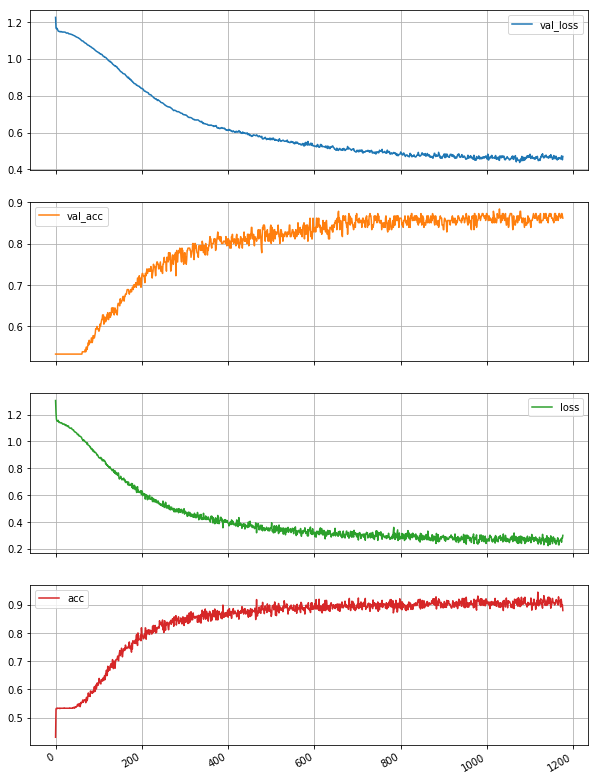

In [55]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [56]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [57]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "rsunkara")
testDataLabel.insert(0, "50292191")

testDataInput.insert(1, "rsunkara")
testDataLabel.insert(1, "50292191")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 10  Correct :90
Testing Accuracy: 90.0
